In [2]:
#Load the data using pandas : Create a DataFrame named df, that contains the training data 
import pandas as pd
df = pd.read_csv('BBC News Train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
# Associate Category names with numerical index and save it in new column category_id
df['category_id'] = df['Category'].factorize()[0]

#View first 10 entries of category_id, as a sanity check
df['category_id'][0:10]

0    0
1    0
2    0
3    1
4    0
5    2
6    3
7    4
8    0
9    4
Name: category_id, dtype: int64

In [4]:
df.head()

,ArticleId,Text,Category,category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [5]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

In [6]:
category_id_df

,Category,category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [7]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [8]:
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [9]:
# Pick 5 random samples from the dataframe
df.sample(5, random_state=0)

,ArticleId,Text,Category,category_id
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,4
354,1349,tory candidate quits over remark a conservativ...,politics,2
1227,1572,bath faced with tindall ultimatum mike tindall...,sport,3
907,1155,chancellor rallies labour voters gordon brown ...,politics,2
575,307,young debut cut short by ginepri fifteen-year-...,sport,3


In [10]:
# Group the dataframe by categories and count items ( number of news articles) in each category
df.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

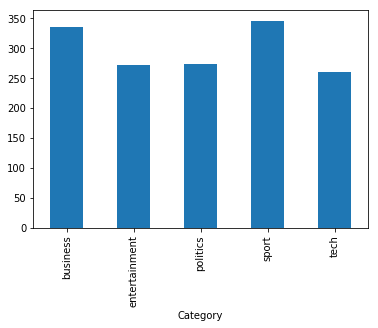

In [12]:
#Plot the distribution of news articles by category
%matplotlib inline
df.groupby('Category').category_id.count().plot.bar(ylim=0)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray() # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df.category_id                           # represents the category of each of the 1490 articles

In [14]:
#Get a feel of the features identified by tfidf
features.shape # How many features are there ? 

(1490, 9927)

In [15]:
# Remember the dictionary created to map category names to a number ? 
category_to_id.items()

dict_items([('business', 0), ('tech', 1), ('politics', 2), ('sport', 3), ('entertainment', 4)])

In [16]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(category_to_id.items())

[('business', 0),
 ('entertainment', 4),
 ('politics', 2),
 ('sport', 3),
 ('tech', 1)]

In [18]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2
import numpy as np

N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'business':
  . Most correlated unigrams:
       . growth
       . bank
       . shares
  . Most correlated bigrams:
       . stock market
       . economic growth
       . analysts said
# 'entertainment':
  . Most correlated unigrams:
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . won best
       . los angeles
       . box office
# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . match
       . coach
       . cup
  . Most correlated bigrams:
       . grand slam
       . champions league
       . australian open
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone


In [19]:
features_chi2

(array([0.13345481, 0.01563765, 0.00108776, ..., 0.00812363, 0.15434356,
        0.120306  ]),
 array([0.71487652, 0.9004835 , 0.97368962, ..., 0.92818297, 0.69441858,
        0.72870284]))

In [20]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 

In [21]:
type(projected_features)

numpy.ndarray

In [22]:
my_id = 0 # Select a category_id
projected_features[(labels[indices] == my_id).values]

array([[ 24.456087  ,   4.991678  ],
       [ 27.14179   ,   8.628061  ],
       [ 10.344382  ,  10.784537  ],
       [ 19.666073  ,  -1.2290062 ],
       [  8.697092  ,  21.827822  ],
       [ 18.77303   ,   3.3936913 ],
       [ 25.724802  ,  21.020649  ],
       [ 19.031704  ,   1.4697374 ],
       [ 31.04694   ,   4.3737874 ],
       [ 15.902427  ,   5.585339  ],
       [ -5.8742695 ,   8.718135  ],
       [ 13.599788  ,   4.4539046 ],
       [ 29.570477  ,  -3.0427206 ],
       [ 17.276978  ,  16.911373  ],
       [ 20.530682  ,  -3.6002219 ],
       [ 15.208641  ,   2.6615133 ],
       [ 25.961794  ,   9.564289  ],
       [ 20.865442  ,   3.0545444 ],
       [ 18.284494  ,  10.597688  ],
       [ 27.65307   ,  17.756382  ],
       [ 22.263596  , -10.799928  ],
       [ 22.98332   ,  12.730338  ],
       [ 10.543774  ,  10.279429  ],
       [ 24.59003   ,  10.60024   ],
       [ 27.568663  ,  11.743236  ],
       [ 24.581089  ,  15.392806  ],
       [ 20.310053  ,  13.514197  ],
 

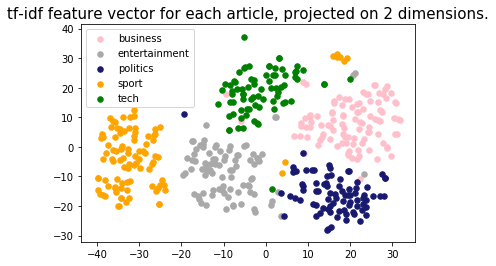

In [25]:
import matplotlib.pyplot as plt 
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

models used for classificaiton
##### Logistic Regression
##### RandomForestClassifier
##### MultinomialNB ( Naive Bayes)

In [26]:
features.shape

(1490, 9927)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

/home/dell/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [28]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [29]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

In [30]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

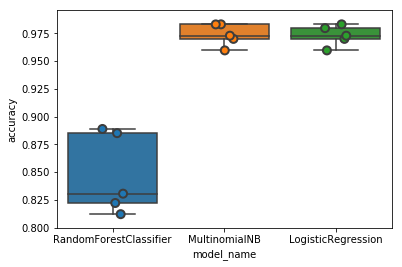

In [31]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [32]:
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.973165
MultinomialNB             0.973838
RandomForestClassifier    0.847763
Name: accuracy, dtype: float64

In [33]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.830565
1,RandomForestClassifier,1,0.812081
2,RandomForestClassifier,2,0.822148
3,RandomForestClassifier,3,0.888889
4,RandomForestClassifier,4,0.885135
5,MultinomialNB,0,0.970100
6,MultinomialNB,1,0.959732
7,MultinomialNB,2,0.983221
8,MultinomialNB,3,0.983165
9,MultinomialNB,4,0.972973


In [34]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5,15,'Predicted')

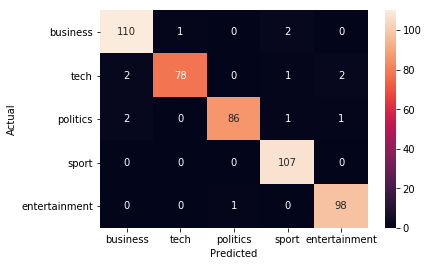

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#####  cases where article was miscategorised in same way at least 2 or more times

In [36]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['Text'])
      print('')

'tech' predicted as 'business' : 2 examples.


641    us woman sues over cartridges a us woman is su...
549    man auctions ad space on forehead a 20-year-ol...
Name: Text, dtype: object


'politics' predicted as 'business' : 2 examples.


962    hatfield executives go on trial engineering fi...
249    eu fraud clampdown urged eu member states are ...
Name: Text, dtype: object


'business' predicted as 'sport' : 2 examples.


61     arsenal  may seek full share listing  arsenal ...
728    christmas shoppers flock to tills shops all ov...
Name: Text, dtype: object


'tech' predicted as 'entertainment' : 2 examples.


1091    ultimate game  award for doom 3 sci-fi shooter...
1115    ultimate game  award for doom 3 sci-fi shooter...
Name: Text, dtype: object

##### Finally - Use all the data to train the model

In [37]:
model.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
# model.coef_ contains the importance of each feature for each category
model.coef_

array([[ 0.61069804,  0.02502889, -0.09060193, ..., -0.03636643,
         0.00419064, -0.04272792],
       [ 0.01975767, -0.04260463, -0.01595794, ...,  0.00227891,
        -0.04324871, -0.03103298],
       [ 0.0980913 , -0.054221  , -0.05799367, ..., -0.01512109,
        -0.04652802, -0.0351415 ],
       [-0.73890367, -0.04391918, -0.06706221, ...,  0.10725441,
         0.1057852 ,  0.12698196],
       [ 0.20278773,  0.15044243,  0.23596437, ..., -0.05775219,
        -0.04755494, -0.03945784]])

##### Print top 5 words / two-word combos for each Category¶

In [39]:
from sklearn.feature_selection import chi2

N = 5
for Category, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])   # This time using the model co-eficients / weights
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Category))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'business':
  . Top unigrams:
       . firm
       . bank
       . company
       . shares
       . market
  . Top bigrams:
       . chief executive
       . analysts said
       . stock market
       . economic growth
       . oil prices
# 'entertainment':
  . Top unigrams:
       . film
       . music
       . singer
       . star
       . band
  . Top bigrams:
       . box office
       . los angeles
       . film festival
       . new york
       . big brother
# 'politics':
  . Top unigrams:
       . labour
       . mr
       . party
       . election
       . government
  . Top bigrams:
       . mr blair
       . prime minister
       . tony blair
       . general election
       . mr brown
# 'sport':
  . Top unigrams:
       . match
       . game
       . win
       . coach
       . cup
  . Top bigrams:
       . year old
       . australian open
       . champions league
       . world cup
       . grand slam
# 'tech':
  . Top unigrams:
       . users
       . software
       .

In [40]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'politics'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'



In [ ]:
# import os
# print(os.listdir("../input/bbc-test"))

In [41]:
# TEST_PATH = os.path.join("../input/bbc-test", "BBC News Test.csv")

#Load the data using pandas : Create a DataFrame
test_df = pd.read_csv('BBC News Test.csv')

In [42]:
test_features = tfidf.transform(test_df.Text.tolist())

Y_pred = model.predict(test_features)

Y_pred

array([3, 1, 3, 0, 3, 3, 2, 2, 4, 0, 0, 1, 2, 1, 4, 3, 2, 1, 4, 4, 0, 2,
       3, 0, 2, 3, 0, 3, 3, 0, 2, 1, 0, 0, 3, 3, 3, 0, 4, 4, 1, 2, 4, 1,
       3, 1, 4, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 4, 3, 1, 3, 4, 1, 2, 0, 4,
       3, 1, 3, 3, 0, 3, 0, 2, 1, 3, 1, 1, 1, 4, 2, 3, 4, 4, 0, 4, 0, 4,
       0, 1, 0, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 0, 3, 2, 3, 2, 4,
       3, 0, 4, 3, 2, 3, 2, 3, 2, 0, 4, 0, 4, 4, 1, 3, 0, 4, 0, 4, 0, 2,
       2, 1, 0, 0, 2, 1, 4, 3, 0, 1, 3, 4, 2, 3, 3, 4, 4, 1, 0, 1, 2, 4,
       3, 3, 3, 3, 4, 1, 0, 1, 0, 1, 0, 1, 4, 1, 1, 2, 0, 2, 0, 0, 4, 2,
       1, 0, 0, 1, 3, 2, 3, 2, 1, 1, 2, 0, 2, 1, 2, 0, 4, 3, 1, 1, 0, 1,
       2, 0, 3, 2, 0, 4, 0, 0, 3, 1, 0, 3, 4, 4, 3, 4, 3, 1, 2, 4, 3, 4,
       3, 4, 2, 0, 1, 4, 0, 2, 0, 1, 0, 3, 2, 2, 0, 2, 3, 0, 4, 2, 3, 2,
       0, 3, 1, 0, 2, 0, 2, 0, 0, 3, 1, 2, 4, 1, 4, 1, 3, 3, 1, 3, 3, 3,
       4, 3, 2, 1, 0, 3, 0, 3, 0, 3, 4, 0, 0, 4, 2, 0, 3, 3, 1, 3, 3, 4,
       0, 3, 1, 2, 4, 0, 0, 2, 3, 4, 2, 0, 3, 3, 1,

In [44]:
# Since all predictions are in terms of "Category IDs (numbers)", need to convert back to Category name
Y_pred_name =[]
for cat_id in Y_pred :
    Y_pred_name.append(id_to_category[cat_id])
    

In [45]:
Y_pred_name

['sport',
 'tech',
 'sport',
 'business',
 'sport',
 'sport',
 'politics',
 'politics',
 'entertainment',
 'business',
 'business',
 'tech',
 'politics',
 'tech',
 'entertainment',
 'sport',
 'politics',
 'tech',
 'entertainment',
 'entertainment',
 'business',
 'politics',
 'sport',
 'business',
 'politics',
 'sport',
 'business',
 'sport',
 'sport',
 'business',
 'politics',
 'tech',
 'business',
 'business',
 'sport',
 'sport',
 'sport',
 'business',
 'entertainment',
 'entertainment',
 'tech',
 'politics',
 'entertainment',
 'tech',
 'sport',
 'tech',
 'entertainment',
 'business',
 'politics',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'tech',
 'politics',
 'tech',
 'entertainment',
 'sport',
 'tech',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'business',
 'entertainment',
 'sport',
 'tech',
 'sport',
 'sport',
 'business',
 'sport',
 'business',
 'politics',
 'tech',
 'sport',
 'tech',
 'tech',
 'tech',
 'entertainment',
 'politics',
 'sport',
 'ent

In [46]:
#Create Submission Dataframe
submission = pd.DataFrame({
        "ArticleId": test_df["ArticleId"],
        "Category": Y_pred_name
    })

In [47]:
# Convert submission dataframe to csv 
# you could use any filename. We choose submission here
submission.to_csv('submission.csv', index=False)